In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
mnist = fetch_mldata('MNIST original')

In [4]:
print mnist.data.shape
print mnist.target.shape

(70000, 784)
(70000,)


In [8]:
num_samples = 5000
sample = np.random.randint(mnist.data.shape[0], size=num_samples)
X = mnist.data[sample]
Y = mnist.target[sample]

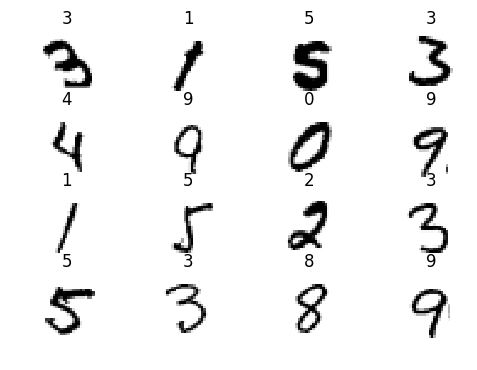

In [10]:
sample_viz = X.reshape((-1,28,28))
for index,val in enumerate(np.random.randint(num_samples, size=16)):
    plt.subplot(4,4,index+1)
    plt.axis('off')
    plt.imshow(sample_viz[val], cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title('%i' % Y[val])
    
plt.show()
    

In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=0.7)

In [14]:
knn = KNeighborsClassifier(3)

In [15]:
knn.fit(Xtrain, Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
print knn.predict(Xtrain[10:15])
print Ytrain[10:15]


[ 9.  0.  3.  7.  8.]
[ 9.  0.  3.  7.  8.]


In [21]:
1 - knn.score(Xtest, Ytest)

0.08333333333333337

In [24]:
krange = range(2,15)
errors = []
for k in krange:
    knn = KNeighborsClassifier(k)
    knn.fit(Xtrain, Ytrain)
    errors.append(1 - knn.score(Xtest, Ytest))
    

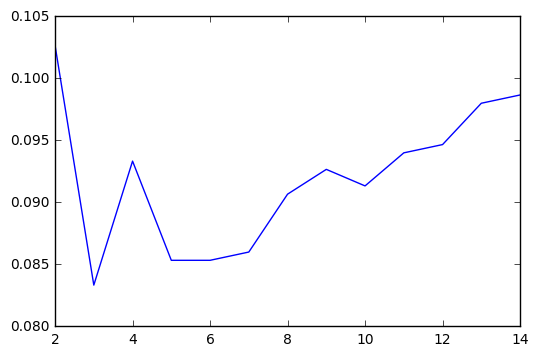

In [25]:
plt.plot(krange, errors)
plt.show()

In [26]:
knn = KNeighborsClassifier(3)
knn.fit(Xtrain, Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [28]:
predict = knn.predict(Xtest)

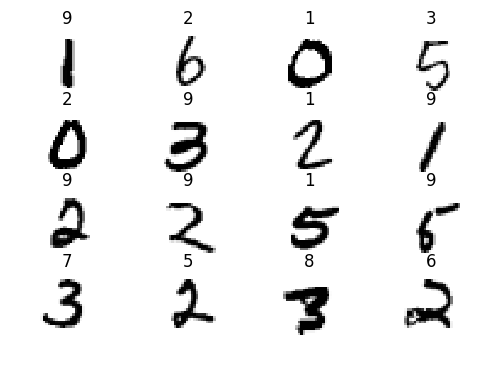

In [30]:
predict_viz = Xtest.reshape((-1,28,28))
misclassified = predict_viz[Ytest != predict]
misclassified_labels = predict[Ytest != predict]
for index,val in enumerate(np.random.randint(misclassified.shape[0], size=16)):
    plt.subplot(4,4,index+1)
    plt.axis('off')
    plt.imshow(predict_viz[val], cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title('%i' % misclassified_labels[val])
    
plt.show()